In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

In [3]:
TRAINING_SIZE = 50000
DIGITS = 3
REVERSE = False #in the main code REVERSE was true as the author insisted on making the questions reverse to make the training faster but
                #here it 's set to false to better viewing the questions and related answers,for real projects it should be set back to true

In [3]:
MAXLEN = DIGITS + 1 + DIGITS
MAXLEN

7

In [4]:
list(enumerate('alireza'))

[(0, 'a'), (1, 'l'), (2, 'i'), (3, 'r'), (4, 'e'), (5, 'z'), (6, 'a')]

In [5]:
[(c, i) for i, c in enumerate('alireza')]

[('a', 0), ('l', 1), ('i', 2), ('r', 3), ('e', 4), ('z', 5), ('a', 6)]

dictioinary can't have similar keys then dict function removes one of 'a's

In [6]:
teststr = dict((c, i) for i, c in enumerate('alireza'))
teststr

{'a': 6, 'l': 1, 'i': 2, 'r': 3, 'e': 4, 'z': 5}

In [7]:
teststr = dict((c, i) for i, c in enumerate('badikosh'))
teststr

{'b': 0, 'a': 1, 'd': 2, 'i': 3, 'k': 4, 'o': 5, 's': 6, 'h': 7}

better programming

In [8]:
teststr={c:i for i,c in enumerate('badikosh')}
teststr

{'b': 0, 'a': 1, 'd': 2, 'i': 3, 'k': 4, 'o': 5, 's': 6, 'h': 7}

<p><span style="color: #ffff99;">when calling a print or str function on an object its __str__ method in its class is called</span></p>

In [9]:
class GenerateSequence:
    
    def __init__(self, chars):
        self.chars = chars
    
    def __str__(self):
        return f" Characters: {str(self.chars)}"
        
# All the numbers, plus sign and space for padding.
chars = "0123456789+ "
gs = GenerateSequence(chars)
print(gs)

 Characters: 0123456789+ 


In [10]:
class GenerateSequence:
    def __init__(self):
        pass
    pass
gs = GenerateSequence()
print(gs)

In [11]:
class GenerateSequence:
    
    def __init__(self, chars):
        self.chars = chars
        self.char_indices = {c: i for i, c in enumerate(self.chars)}
        self.indices_char = dict(enumerate(self.chars))
    
    def __str__(self):
        return (
            f"Characters: {str(self.chars)}"
            + "\nChar Indices: "
            + str(self.char_indices)
            + "\nIndices Char: "
            + str(self.indices_char)
        )
        
# All the numbers, plus sign and space for padding.
chars = "0123456789+ "
gs = GenerateSequence(chars)
print(gs)

Characters: 0123456789+ 
Char Indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, ' ': 11}
Indices Char: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: ' '}


In [12]:
chars='ali'
print(sorted(set(chars)))
set(chars)

['a', 'i', 'l']


{'a', 'i', 'l'}

In [13]:
a=np.array([[1,2,1],[0,4,6]])
a



array([[1, 2, 1],
       [0, 4, 6]])

In [14]:
b=a.argmax(axis=0)  #Returns the indices of the maximum values along an axis
b

array([0, 1, 1], dtype=int64)

In [15]:
b=a.argmax(axis=1)  
b

array([1, 2], dtype=int64)

In [16]:
b=a.argmax(axis=-1)  # if axis=-1 it will be the last dimension
b

array([1, 2], dtype=int64)

In [4]:
class colors:
    ok = '\033[92m'
    fail = '\033[91m'
    close = '\033[0m'

<h3><span style="color: #ffff99;">how to print colored chars:</span></h3>
<ul>
<li><span style="color: #ffff99;">go to <span style="color: #99ccff;"><a style="color: #99ccff;" href="https://ansi.gabebanks.net/">https://ansi.gabebanks.net/</a></span></span></li>
<li><span style="color: #ffff99;">select color,style,...</span></li>
<li><span style="color: #ffff99;">insert it behind what you want to color</span></li>
<li><span style="color: #ffff99;">remember to use reset code afterward as it keeps the same color for printing if the reset code isn't uesd</span></li>
</ul>

In [18]:
class testcolors:   #mind to use = not : for assigning values to variables
    yellow='\033[43m'
    red='\033[31m'
    italic_underlined_magenta='\033[35;3;4m'
    reset='\033[0m'
                
print(f'unghanged text\033[33myellow text\033[0m ') #using the code itself
print(f'{testcolors.red}red text{testcolors.reset}')
print(f'{testcolors.italic_underlined_magenta}undelined italic magenta text{testcolors.reset}')

unghanged textyellow text 
red text
undelined italic magenta text


<h2><span style="color: #ffff99;">main code</span></h2>

<p><span style="color: #ffff99;"><strong>encode function</strong> will encode the given sentence in the one-hot encoding. And <strong>decode function</strong> will give vector or 2D array to their character output</span></p>

In [6]:
class GenerateSequence:
    
    def __init__(self, chars):  #chars='0123456789+ '
        self.chars = chars
        self.char_indices = {c: i for i, c in enumerate(self.chars)}
        self.indices_char = dict(enumerate(self.chars))
    
    def encode(self, sentence, MAXLEN):    #MAXLEN= digits(3)+1+digits=7 for training data and 4 for their labels
        """One-hot encoding for given string sentence.
        # Arguments
            sentence: string, to be encoded.
            MAXLEN: Number of rows in the returned one-hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((MAXLEN, len(self.chars)))
        for i, s in enumerate(sentence):
            x[i, self.char_indices[s]] = 1
        return x
    
    def decode(self, x, calc_argmax = True):
        """Decode the given vector or 2D array to their character output.
        # Arguments
            x: A vector or a 2D array of probabilities or one-hot representations;
                or a vector of character indices (used with `calc_argmax=False`).
            calc_argmax: Whether to find the character index with maximum
                probability, defaults to `True`.
        """
        if calc_argmax:
            x = x.argmax(axis = -1)
        return "".join(self.indices_char[x] for x in x)
    
    def __str__(self):
        return (
            f"Characters: {str(self.chars)}"
            + "\nChar Indices: "
            + str(self.char_indices)
            + "\nIndices Char: "
            + str(self.indices_char)
        )
# All the numbers, plus sign and space for padding.
chars = "0123456789+ "
gs = GenerateSequence(chars)
print(gs)

Characters: 0123456789+ 
Char Indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, ' ': 11}
Indices Char: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: ' '}


In [20]:
x=lambda y:y+10
print(x(3))


13


In [21]:

a=lambda:2+3
print(a)


<function <lambda> at 0x0000019AA532AB90>


In [22]:

print(a())  #a is a function so it should be used with ()


5


In [23]:

def myfunc(n):
  return lambda m:m-n

subtr=myfunc(2)
print(subtr(12))  #when writing 12 m is offered by python meaning you should enter the value for m
print(myfunc(13)(4))


10
-9


In [24]:

list('01234')


['0', '1', '2', '3', '4']

In [25]:

np.random.choice(list("0123456789"))

'1'

In [26]:
# Python3 code to demonstrate the
# working of set() on list and tuple

# initializing list
lis1 = [ 3, 4, 1, 4, 5 ]

# initializing tuple
tup1 = (3, 4, 1, 4, 5)

# Printing iterables before conversion
print(f"The list before conversion is : {lis1}")
print(f"The tuple before conversion is : {tup1}")

# Iterables after conversion are
# notice distinct elements
print(f"The list after conversion is : {set(lis1)}")
print(f"The tuple after conversion is : {set(tup1)}")

The list before conversion is : [3, 4, 1, 4, 5]
The tuple before conversion is : (3, 4, 1, 4, 5)
The list after conversion is : {1, 3, 4, 5}
The tuple after conversion is : {1, 3, 4, 5}


<h3><span style="color: #ffff99;">numpy.random.randint</span></h3>
<p><span style="color: #ffff99;">Return random integers from the &ldquo;discrete uniform&rdquo; distribution of the specified dtype in the &ldquo;half-open&rdquo; interval [<em class="xref py py-obj">low</em>,&nbsp;<em class="xref py py-obj">high</em>)</span></p>
<p><span style="color: #ffff99;">input parameters:</span></p>
<ul>
<li><span style="color: #ffff99;"><strong>size:&nbsp;</strong><span class="classifier">int or tuple of ints, optional</span></span>
<p><span style="color: #ffff99;">Output shape. If the given shape is, e.g.,&nbsp;<code class="docutils literal notranslate"><span class="pre">(m,</span>&nbsp;<span class="pre">n,</span>&nbsp;<span class="pre">k)</span></code>, then&nbsp;<code class="docutils literal notranslate"><span class="pre">m</span>&nbsp;<span class="pre">*</span>&nbsp;<span class="pre">n</span>&nbsp;<span class="pre">*</span>&nbsp;<span class="pre">k</span></code>&nbsp;samples are drawn. Default is None, in which case a single value is returned.</span></p>
</li>
</ul>

In [27]:
a=tuple(sorted((2,1)))
a

(1, 2)

<p><span style="color: #99ccff;">The continue keyword is used to end the current iteration in a for loop (or a while loop), and continues to the next iteration</span></p>

In [28]:
for i in range(9):
  if i == 3:
    continue
  print(i)




0
1
2
4
5
6
7
8


In [29]:
start=0
while start<=5:
  start+=1
  if start == 3:
    continue
  print(start)




1
2
4
5
6


In [30]:
query ='123456789' 
print(query[::2])   #notice that 9 is  printed meaning that the last index has been included
print(query[::-1])


13579
987654321


In [31]:
np.arange(5)    #doesn't include the number 5 itself as always

array([0, 1, 2, 3, 4])

In [32]:
a = np.array([[4,3, 1],[5 ,7, 0],[9, 9, 3],[8, 2, 4]])
print(a)
a[[0, 2]] = a[[2, 0]]
print(a)

[[4 3 1]
 [5 7 0]
 [9 9 3]
 [8 2 4]]
[[9 9 3]
 [5 7 0]
 [4 3 1]
 [8 2 4]]


In [33]:
# a=[[1,2,3,4],[5,6,7,8]]
a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b=np.arange(3)
np.random.shuffle(b)    #type b:class 'numpy.ndarray'
# print(type(b))
print(b)
a=a[b]  #'only integer scalar arrays can be converted to a scalar index' error arises when we define a as [[1,2,3,4],[5,6,7,8]] which is a list,we should 
        #define it as numpy array so that it can be indexed in this way
a       #a=a[b] only first dimension is changed and shuffled


[2 0 1]


array([[ 9, 10, 11, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8]])

In [34]:
# a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a[[0,1,2]]=a[[2,1,0]]
# a[[0,1,2]]=a[[1,0,1]]
a

array([[ 5,  6,  7,  8],
       [ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [35]:

(a,b)=2+1,3*4   #tuple simultanious initilaizing
(a,b)

(3, 12)

<h2><span style="color: #ffcc00;">generating data</span></h2>

In [36]:
questions = []
expected = []
existed = set() #existed is existing set of created samples,it is defined as a set so as to prevent any similar sample
print('Generating data...')
while len(questions) < TRAINING_SIZE:   #TRAINING_SIZE = 50000
    f = lambda: int(
        "".join(
            np.random.choice(list("0123456789"))
            for _ in range(np.random.randint(1, DIGITS + 1))
        )
    )
    a, b = f(), f() #f is function so it should be used with ()
    ## Skip any addition questions which  already exists. To skip  any such that x+Y == Y+x, so sorting).
    key = tuple(sorted((a, b)))
    if key in existed:
        continue
    existed.add(key)

    # Pad the data with spaces such that it is always MAXLEN.
    q = f"{a}+{b}"
    query = q + " " * (MAXLEN - len(q))

    ans = str(a + b)
    # Answers can be of maximum size DIGITS + 1.
    ans += " " * (DIGITS + 1 - len(ans))    #pads ans to make it 4-char long

    if REVERSE:
        # Reverse the query, e.g., '12+345  ' becomes '  543+21'.note space used for padding
        query = query[::-1]

    questions.append(query)
    expected.append(ans)

print("Total questions:", len(questions))

Generating data...
Total questions: 50000


In [37]:
# print(questions[:20])
for i in range(20):
    print(questions[i])

4+36   
9+1    
59+13  
314+62 
25+73  
8+21   
1+195  
478+827
37+458 
67+1   
541+9  
34+9   
21+1   
11+2   
5+979  
2+18   
74+68  
7+5    
2+35   
5+952  


In [38]:
print('Vectorization...')
x = np.zeros((len(questions), MAXLEN, len(chars)), dtype = bool)
y = np.zeros((len(questions), DIGITS + 1, len(chars)), dtype = bool)

Vectorization...


In [39]:
x.shape

(50000, 7, 12)

In [40]:
y.shape

(50000, 4, 12)

In [41]:
for i, sentence in enumerate(questions):
    x[i] = gs.encode(sentence, MAXLEN)  #x[i]=one-hot encoded question from 50000 questions

In [42]:
for i, sentence in enumerate(expected):
    y[i] = gs.encode(sentence, DIGITS + 1)  #y[i]=one-hot encoded answer from 50000 answers

In [43]:
indices = np.arange(len(y)) #0~49999
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
print(x.shape)
print(y.shape)

(50000, 7, 12)
(50000, 4, 12)


In [44]:
print(x[0][0])

[False False False False False  True False False False False False False]


In [45]:
print(y[0][0])

[False False False False False False  True False False False False False]


<h3><span style="color: #ffff99;">train test splitting</span></h3>

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size = 0.2, random_state = 50)

In [47]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(40000, 7, 12)
(10000, 7, 12)
(40000, 4, 12)
(10000, 4, 12)


In [48]:
for i in range(10):
    print(f'{questions[i]} => {expected[i]}')

4+36    => 40  
9+1     => 10  
59+13   => 72  
314+62  => 376 
25+73   => 98  
8+21    => 29  
1+195   => 196 
478+827 => 1305
37+458  => 495 
67+1    => 68  


<h2><span style="color: #ffff99;">model training</span></h2>

In [49]:
RNN = keras.layers.SimpleRNN
HIDDEN_SIZE = 128
BATCH_SIZE = 128

print('model building...')
model = keras.models.Sequential()

# "Encode" the input sequence using an RNN, producing an output of HIDDEN_SIZE.
model.add(RNN(HIDDEN_SIZE, input_shape=(MAXLEN, len(chars))))

# As the decoder RNN's input, repeatedly provide with the last output of
# RNN for each time step. Repeat 'DIGITS + 1' times as that's the maximum
# length of output, e.g., when DIGITS=3, max output is 999+999=1998.
model.add(keras.layers.RepeatVector(DIGITS + 1))

# The decoder RNN could be multiple layers stacked or a single layer.
model.add(RNN(HIDDEN_SIZE*2, return_sequences=True))

# Apply a dense layer to the every temporal slice of an input. For each of step
# of the output sequence, decide which character should be chosen.
model.add(keras.layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()     

model building...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               18048     
                                                                 
 repeat_vector (RepeatVector  (None, 4, 128)           0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 4, 256)            98560     
                                                                 
 dense (Dense)               (None, 4, 12)             3084      
                                                                 
Total params: 119,692
Trainable params: 119,692
Non-trainable params: 0
_________________________________________________________________


<p><span style="color: #ffff99;">128*(128+12+1)=18048 # of first layer parameters </span></p>
<p><span style="color: #ffff99;">256*(256+128+1)=98560 # of second RNN layer parameters </span></p>
<p><span style="color: #ffff99;">12*(256+1)=3084 # of dense layer parameters</span></p>
<p><span style="color: #ffff99;">None means batch size</span></p>

In [50]:
print(type(x_validation))
print(x_validation.shape)
print(x_validation[3])
print('\ntype(x_validation[3]:',type(x_validation[3]))
ind = np.random.randint(0, len(x_validation))
print(ind)
rowx=x_validation[ind]
rowxtest=x_validation[np.array([ind])]
print('\nnp.array([ind]):',np.array([ind]))
print('\nrowx:',rowx)
print('\n----')
print('rowxtest:\n',rowxtest)
print('type(rowxtest):\n',type(rowxtest))   #rowx and rowxtest are just the same but rowxtest is 3 dimensional and rowx is 2 dimesional


<class 'numpy.ndarray'>
(10000, 7, 12)
[[False False False False False False False False  True False False False]
 [False False False  True False False False False False False False False]
 [False  True False False False False False False False False False False]
 [False False False False False False False False False False  True False]
 [False False False False False False  True False False False False False]
 [False False False False False False False False False False False  True]
 [False False False False False False False False False False False  True]]

type(x_validation[3]: <class 'numpy.ndarray'>
5759

np.array([ind]): [5759]

rowx: [[False False False False False False False False False  True False False]
 [ True False False False False False False False False False False False]
 [False False False False False False False False False False  True False]
 [False False False False False  True False False False False False False]
 [False False False False False False False  True F

In [51]:
a=[[1,2,3,4],[5,6,7,8],[9,10,11,12]]
print(a)
print(type(a))
b=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(b)    #b is a ndarray so it is shown without commas
print(type(b))

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
<class 'list'>
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
<class 'numpy.ndarray'>


<ul>
<li><span style="color: #ffff99;">Let&rsquo;s first understand the Input and its shape in LSTM Keras. The input data to&nbsp;<strong class="lr fx">LSTM</strong>&nbsp;looks like the following diagram.</span></li>
</ul>

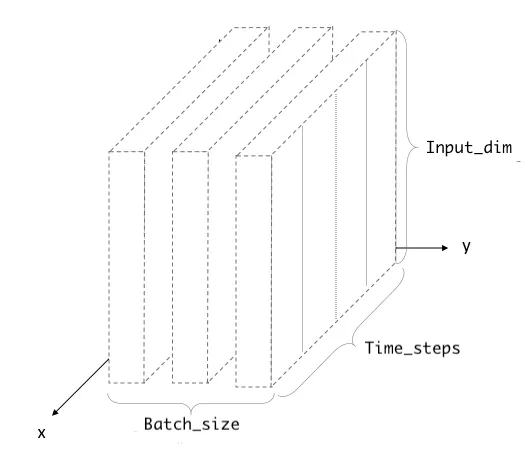

<ul>
<li><span style="color: #ffff99;">You always have to give a three-dimensional array as an input to your LSTM network. Where the first dimension represents the batch size, the second dimension represents the time-steps and the third dimension represents the number of units in one input sequence. For example, the input shape looks like (batch_size, time_steps, units). Let&rsquo;s look at an example in Keras.</span></li>
</ul>

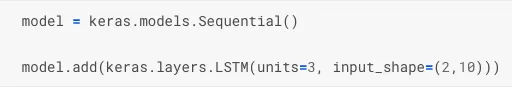

<ul>
<li><span style="color: #ffff99;">Let&rsquo;s look at the input_shape argument. Though it seems input is a 2D array, we actually have to pass a 3D array with a shape of (batch_size, 2, 10). Means the value of time steps is 2, input units are 10 and you have the flexibility to feed any batch size at the time of fitting the data to the network.</span></li>
</ul>

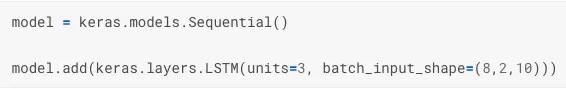

<ul>
<li><span style="color: #ffff99;">You can also give an argument called batch_input_shape instead of input_shape. The difference is now you have to give a fixed batch size and your input array shape will look like (8, 2, 10). If you try to feed a different batch size other than 8, you will get an error.</span></li>
</ul>

<h3><span style="color: #ccffff;">Now, let&rsquo;s look at the output and its shape in the LSTM network</span></h3>

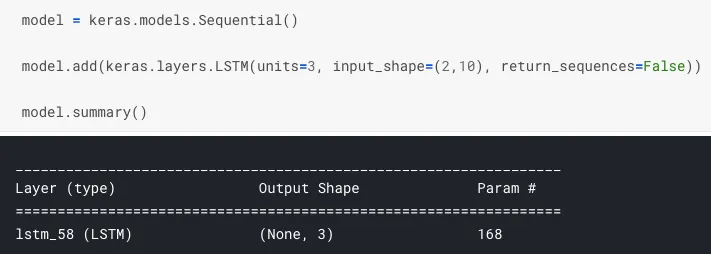

<ul>
<li><span style="color: #ffff99;">Let&rsquo;s look at the other arguments. Argument units represent the number of output units in the LSTM which is 3 here. So output shape is (None, 3). The first dimension of output is None because we do not know the batch size in advance. So the actual output shape will be (batch_size, 3) here.</span></li>
</ul>

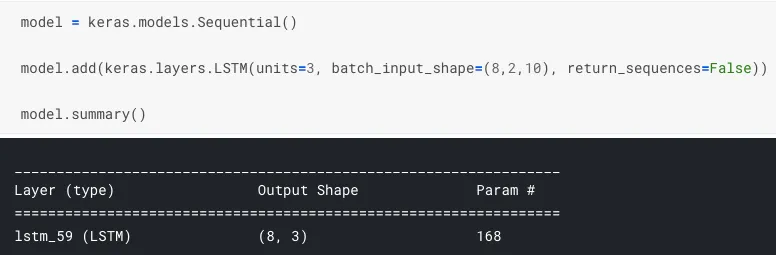

<ul>
<li><span style="color: #ffff99;">Here we see that I defined&nbsp;<strong class="lr fx">batch_size</strong>&nbsp;in advance and the output shape became&nbsp;<em class="ng">(8, 3)</em>&nbsp;which makes sense.</span></li>
</ul>

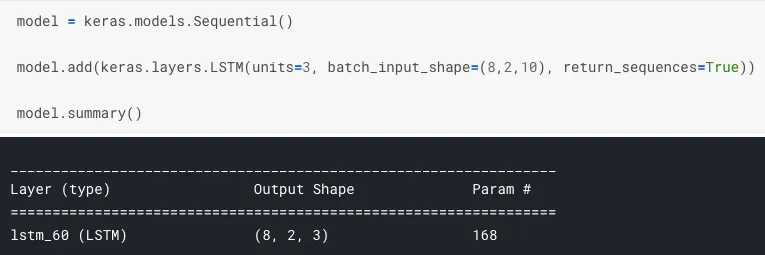

<ul>
<li><span style="color: #ffff99;">Now, look at another argument return_sequences. This argument tells whether to return the output at each time step instead of the final time step. As we set the return_sequences to True, the output shape becomes a 3D array, instead of a 2D array. Now the shape of the output is (8, 2, 3). We see that there is one extra dimension in between representing the number of time steps.</span></li>
</ul>

<h3 id="5f63" class="nm nn fw be no np nq nr ns nt nu nv nw nx ny nz oa ob oc od oe of og oh oi oj bj"><span style="color: #ffff99;">Summary</span></h3>
<ul class="">
<li id="956f" class="lp lq fw lr b ls ok lu lv lw ol ly lz om on mc md oo op mg mh oq or mk ml mm os ot ou bj" data-selectable-paragraph=""><span style="color: #ffff99;">The input of the&nbsp;<strong class="lr fx">LSTM</strong>&nbsp;is always is a 3D array.&nbsp;<em class="ng">(batch_size, time_steps, units)</em></span></li>
<li id="e18b" class="lp lq fw lr b ls ov lu lv lw ow ly lz om ox mc md oo oy mg mh oq oz mk ml mm os ot ou bj" data-selectable-paragraph=""><span style="color: #ffff99;">The output of the&nbsp;<strong class="lr fx">LSTM</strong>&nbsp;could be a 2D array or 3D array depending upon the&nbsp;<strong class="lr fx">return_sequences</strong>&nbsp;argument.</span></li>
<li id="2bd5" class="lp lq fw lr b ls ov lu lv lw ow ly lz om ox mc md oo oy mg mh oq oz mk ml mm os ot ou bj" data-selectable-paragraph=""><span style="color: #ffff99;">If&nbsp;<strong class="lr fx">return_sequence</strong>&nbsp;is False, the output is a 2D array.&nbsp;<em class="ng">(batch_size, units)</em></span></li>
<li id="224a" class="lp lq fw lr b ls ov lu lv lw ow ly lz om ox mc md oo oy mg mh oq oz mk ml mm os ot ou bj" data-selectable-paragraph=""><span style="color: #ffff99;">If&nbsp;<strong class="lr fx">return_sequence</strong>&nbsp;is True, the output is a 3D array.&nbsp;<em class="ng">(batch_size, time_steps, units)</em></span></li>
</ul>

<h1><span style="color: #ff9900;">simple RNN</span></h1>


--------------------------------------------------
Iteration: 1


313/313 [==============================] - 5s 12ms/step - loss: 1.6646 - accuracy: 0.3953 - val_loss: 1.5449 - val_accuracy: 0.4345
model.fit completed
1/1 [==============================] - 0s 261ms/step
Q:  688+520 T:  1208 ☒ 1329
1/1 [==============================] - 0s 19ms/step
Q:  936+45  T:  981  ☒ 901 
1/1 [==============================] - 0s 19ms/step
Q:  255+67  T:  322  ☒ 399 
1/1 [==============================] - 0s 20ms/step
Q:  75+832  T:  907  ☒ 899 
1/1 [==============================] - 0s 19ms/step
Q:  887+34  T:  921  ☒ 891 
1/1 [==============================] - 0s 19ms/step
Q:  76+98   T:  174  ☒ 105 
1/1 [==============================] - 0s 19ms/step
Q:  379+673 T:  1052 ☒ 115 
1/1 [==============================] - 0s 19ms/step
Q:  45+786  T:  831  ☒ 852 
1/1 [==============================] - 0s 20ms/step
Q:  9+808   T:  817  ☒ 108 
1/1 [==============================] - 0s 19ms/step
Q:  12+96   T:  108  ☒ 10  

----------------------------------------------

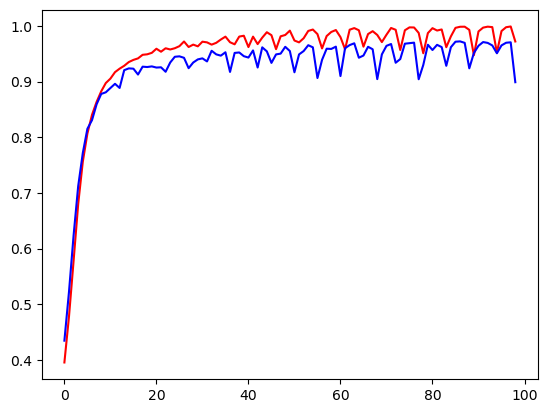

In [52]:
# Train the model each generation and show predictions against the validation dataset.
# HIDDEN_SIZE = 128
train_acc = []
valid_acc = []
for iteration in range(1, 100):
    print()
    print('-' * 50)
    print('Iteration:', iteration)
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,  # BATCH_SIZE = 128
                        epochs=1,
                        validation_data=(x_validation, y_validation))
    print('model.fit completed')

    train_acc.append(history.history['accuracy'])   #one epoch ==> one value for accuracies
    valid_acc.append(history.history['val_accuracy'])

    # Select 10 samples from the validation set randomly so we can visualize errors.
    for _ in range(10):
        ind = np.random.randint(0, len(x_validation))
        x_val, y_val = x_validation[np.array([ind])], y_validation[np.array([ind])] # x_val, y_val = x_validation[ind], y_validation[ind] is wrong as RNN should be given 
                                                                                    #3D matrix as input 
        predictions =np.argmax(model.predict(x_val), axis=-1)    #second simple RNN output=>(1, 4, 256) last output=>(1, 4, 12) axis=-1==>3rd dimension

        question = gs.decode(x_val[0])  #x_val[0]=>(7,12) array
        correct = gs.decode(y_val[0])   #y_val[0]=>(4,12) array
        prediction = gs.decode(predictions[0], calc_argmax = False) #predictions[0]=>(4,12) array

        print("Q: ", question[::-1] if REVERSE else question, end=" ")  #end=:By default, the value of this parameter is ‘\n’, i.e. the new line character
        print("T: ", correct, end=" ")

        if correct == prediction:
            print(f"{colors.ok}☑{colors.close} {prediction}")
        else:
            print(f"{colors.fail}☒{colors.close} {prediction}")

        # q = ctable.decode(rowx[0])
        # q = ctable.decode(rowx)
        # correct = ctable.decode(rowy[0])
        # correct = ctable.decode(rowy)
        # guess = ctable.decode(preds[0], calc_argmax=False)
        # guess = ctable.decode(preds, calc_argmax=False)
        # print('Q', q[::-1] if REVERSE else q, end=' ')
        # print('T', correct, end=' ')
        # if correct == guess:
        #     print(f'{colors.ok}☑{colors.close}', end=' ')
        # else:
        #     print(f'{colors.fail}☒{colors.close}', end=' ')
        # print(guess)

plt.plot(train_acc, 'r')
plt.plot(valid_acc, 'b')
plt.show()

<h1><span style="color: #ff9900;">LSTM</span></h1>

In [53]:
num_layers = 1
model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(MAXLEN, len(chars))))
model.add(layers.RepeatVector(DIGITS + 1))
# The decoder RNN can be multiple layers stacked or a single layer.
for _ in range(num_layers):
    model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72192     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 4, 128)           0         
 or)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            131584    
                                                                 
 dense_1 (Dense)             (None, 4, 12)             1548      
                                                                 
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
_________________________________________________________________


<p><span style="color: #ffcc00;"><strong>LSTM parameter number = 4 &times; ((x + h) &times; h +h)--->4*(128*(128+12+1))=72192</strong></span></p>

<p><span style="color: #ffcc00;"><strong>second LSTM parameter number = 4*128*(128+128+1)= 131584  note that multiplying 4 doesn't have anything to do with 4 outputs,it is bacause of lstm itself </strong></span></p>


--------------------------------------------------
Iteration: 1
313/313 [==============================] - 14s 30ms/step - loss: 1.9015 - accuracy: 0.3193 - val_loss: 1.8156 - val_accuracy: 0.3374
model.fit completed
1/1 [==============================] - 1s 903ms/step
Q:  711+63  T:  774  ☒ 101 
1/1 [==============================] - 0s 20ms/step
Q:  7+233   T:  240  ☒ 10  
1/1 [==============================] - 0s 20ms/step
Q:  81+906  T:  987  ☒ 101 
1/1 [==============================] - 0s 20ms/step
Q:  57+91   T:  148  ☒ 101 
1/1 [==============================] - 0s 21ms/step
Q:  175+48  T:  223  ☒ 101 
1/1 [==============================] - 0s 28ms/step
Q:  7+892   T:  899  ☒ 101 
1/1 [==============================] - 0s 25ms/step
Q:  810+88  T:  898  ☒ 101 
1/1 [==============================] - 0s 24ms/step
Q:  13+873  T:  886  ☒ 101 
1/1 [==============================] - 0s 26ms/step
Q:  934+758 T:  1692 ☒ 101 
1/1 [==============================] - 0s 27ms/step
Q:  14+33

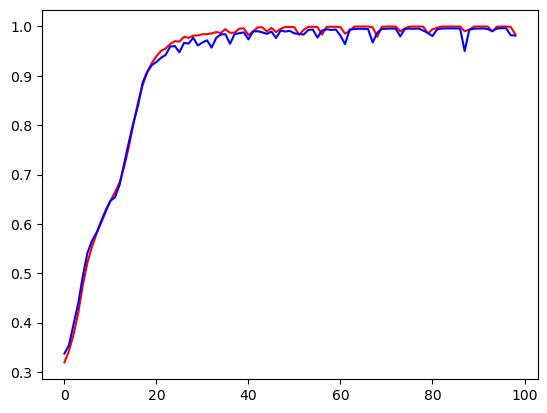

In [55]:
epochs = 100
batch_size = 32
train_acc = []
valid_acc = []
for iteration in range(1, 100):
    print()
    print('-' * 50)
    print('Iteration:', iteration)
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,  
                        epochs=1,
                        validation_data=(x_validation, y_validation))
    print('model.fit completed')

    train_acc.append(history.history['accuracy'])   #one epoch ==> one value for accuracies
    valid_acc.append(history.history['val_accuracy'])

    # Select 10 samples from the validation set randomly so we can visualize errors.
    for _ in range(10):
        ind = np.random.randint(0, len(x_validation))
        x_val, y_val = x_validation[np.array([ind])], y_validation[np.array([ind])] # x_val, y_val = x_validation[ind], y_validation[ind] is wrong as RNN should be 
        predictions =np.argmax(model.predict(x_val), axis=-1)    #second simple RNN output=>(1, 4, 256) last output=>(1, 4, 12) axis=-1==>3rd dimension

        question = gs.decode(x_val[0])  #x_val[0]=>(7,12) array
        correct = gs.decode(y_val[0])   #y_val[0]=>(4,12) array
        prediction = gs.decode(predictions[0], calc_argmax = False) #predictions[0]=>(4,12) array

        print("Q: ", question[::-1] if REVERSE else question, end=" ")  #end=:By default, the value of this parameter is ‘\n’, i.e. the new line character
        print("T: ", correct, end=" ")

        if correct == prediction:
            print(f"{colors.ok}☑{colors.close} {prediction}")
        else:
            print(f"{colors.fail}☒{colors.close} {prediction}")

plt.plot(train_acc, 'r')
plt.plot(valid_acc, 'b')
plt.show()
 

<h2><span style="color: #ffcc00;">longer numbers</span></h2>

In [7]:
DIGITS = 6
MAXLEN=DIGITS+1+DIGITS
TRAINING_SIZE = 100000
questions = []
expected = []
existed = set() #existed is existing set of created samples,it is defined as a set so as to prevent any similar sample
print('Generating data...')
while len(questions) < TRAINING_SIZE:   #TRAINING_SIZE = 100000
    f = lambda: int(
        "".join(
            np.random.choice(list("0123456789"))
            for _ in range(np.random.randint(1, DIGITS + 1))
        )
    )
    a, b = f(), f() #f is function so it should be used with ()
    ## Skip any addition questions which  already exists.
    key = tuple(sorted((a, b)))
    if key in existed:
        continue
    existed.add(key)

    # Pad the data with spaces such that it always equals to MAXLEN.
    q = f"{a}+{b}"
    query = q + " " * (MAXLEN - len(q))

    ans = str(a + b)
    # Answers can be of maximum size DIGITS + 1.
    ans += " " * (DIGITS + 1 - len(ans))    #pads ans to make it 7-char long

    if REVERSE:
        # Reverse the query, e.g., '12+345  ' becomes '       543+21'.note space used for padding
        query = query[::-1]

    questions.append(query)
    expected.append(ans)

print("Total questions:", len(questions))
for i in range(20):
    print(questions[i])

Generating data...
Total questions: 100000
60+61728     
9+9773       
214+6        
9768+89      
125548+1     
83+301554    
675385+335   
52049+31084  
95194+7      
42876+994286 
256+844612   
130254+17    
206+6        
1+95         
7126+713460  
3+160780     
19+1         
902031+16    
875+12       
48034+274    


In [8]:
print('Vectorization...')
x = np.zeros((len(questions), MAXLEN, len(chars)), dtype = bool)
y = np.zeros((len(questions), DIGITS + 1, len(chars)), dtype = bool)

Vectorization...


In [9]:
x.shape

(100000, 13, 12)

In [10]:
y.shape


(100000, 7, 12)

In [11]:

for i, sentence in enumerate(questions):
    x[i] = gs.encode(sentence, MAXLEN)  #x[i]=one-hot encoded question from 100000 questions


In [12]:
for i, sentence in enumerate(expected):
    y[i] = gs.encode(sentence, DIGITS + 1)  #y[i]=one-hot encoded answer from 100000 answers


In [13]:
indices = np.arange(len(y)) #0~99999
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
print(x.shape)
print(y.shape)


(100000, 13, 12)
(100000, 7, 12)


In [14]:
print(x[0][0])


[False False False False False False  True False False False False False]


In [15]:

from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size = 0.2, random_state = 50)
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)


(80000, 13, 12)
(20000, 13, 12)
(80000, 7, 12)
(20000, 7, 12)


In [16]:
for i in range(10):
    print(f'{questions[i]} => {expected[i]}')

60+61728      => 61788  
9+9773        => 9782   
214+6         => 220    
9768+89       => 9857   
125548+1      => 125549 
83+301554     => 301637 
675385+335    => 675720 
52049+31084   => 83133  
95194+7       => 95201  
42876+994286  => 1037162


In [18]:
def train_model(RNN):
    HIDDEN_SIZE = 128
    BATCH_SIZE = 128

    print('model building...')
    model = keras.models.Sequential()

    # "Encode" the input sequence using an RNN, producing an output of HIDDEN_SIZE.
    model.add(RNN(HIDDEN_SIZE, input_shape=(MAXLEN, len(chars))))

    # As the decoder RNN's input, repeatedly provide with the last output of
    # RNN for each time step. Repeat 'DIGITS + 1' times as that's the maximum
    # length of output, e.g., when DIGITS=3, max output is 999+999=1998.
    model.add(keras.layers.RepeatVector(DIGITS + 1))

    # The decoder RNN could be multiple layers stacked or a single layer.
    model.add(RNN(HIDDEN_SIZE*2, return_sequences=True))

    # Apply a dense layer to the every temporal slice of an input. For each of step
    # of the output sequence, decide which character should be chosen.
    model.add(keras.layers.Dense(len(chars), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    model.summary() 
    epochs = 100
    train_acc = []
    valid_acc = []
    for iteration in range(1, 100):
        print()
        print('-' * 50)
        print('Iteration:', iteration)
        history = model.fit(x_train, y_train,
                            batch_size=BATCH_SIZE,  
                            epochs=1,
                            validation_data=(x_validation, y_validation))
        print('model.fit completed')

        train_acc.append(history.history['accuracy'])   #one epoch ==> one value for accuracies
        valid_acc.append(history.history['val_accuracy'])

        # Select 10 samples from the validation set randomly so we can visualize errors.
        for _ in range(10):
            ind = np.random.randint(0, len(x_validation))
            x_val, y_val = x_validation[np.array([ind])], y_validation[np.array([ind])] # x_val, y_val = x_validation[ind], y_validation[ind] is wrong as RNN should be 
            predictions =np.argmax(model.predict(x_val), axis=-1)    #second simple RNN output=>(1, 4, 256) last output=>(1, 4, 12) axis=-1==>3rd dimension

            question = gs.decode(x_val[0])  #x_val[0]=>(7,12) array
            correct = gs.decode(y_val[0])   #y_val[0]=>(4,12) array
            prediction = gs.decode(predictions[0], calc_argmax = False) #predictions[0]=>(4,12) array

            print("Q: ", question[::-1] if REVERSE else question, end=" ")  #end=:By default, the value of this parameter is ‘\n’, i.e. the new line character
            print("T: ", correct, end=" ")

            if correct == prediction:
                print(f"{colors.ok}☑{colors.close} {prediction}")
            else:
                print(f"{colors.fail}☒{colors.close} {prediction}")

    plt.plot(train_acc, 'r')
    plt.plot(valid_acc, 'b')
    plt.show() 

<h2><span style="color: #ffcc00;">simple RNN 6 digits</span></h2>

model building...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               18048     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 7, 256)            98560     
                                                                 
 dense_2 (Dense)             (None, 7, 12)             3084      
                                                                 
Total params: 119,692
Trainable params: 119,692
Non-trainable params: 0
_________________________________________________________________

--------------------------------------------------
Iteration: 1
625/625 [======================

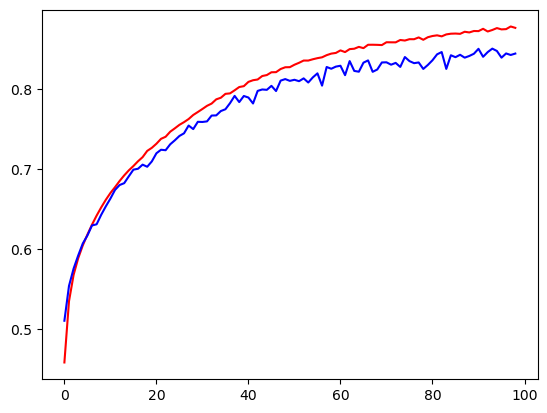

In [67]:
train_model(keras.layers.SimpleRNN)

<h2><span style="color: #ffcc00;">LSTM 6 digits</span></h2>

model building...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               72192     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 7, 256)            394240    
                                                                 
 dense_3 (Dense)             (None, 7, 12)             3084      
                                                                 
Total params: 469,516
Trainable params: 469,516
Non-trainable params: 0
_________________________________________________________________

--------------------------------------------------
Iteration: 1
625/625 [======================

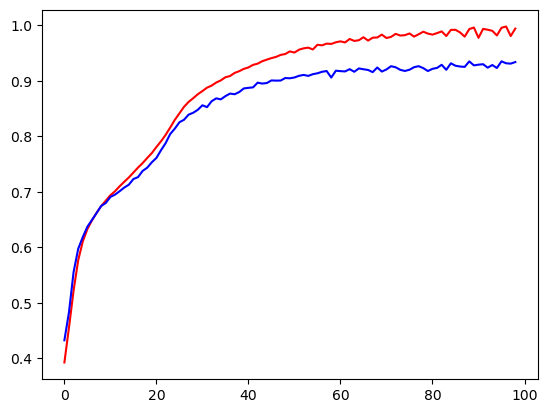

In [68]:
train_model(keras.layers.LSTM)

<h2><span style="color: #ffcc00;">GRU 6 digits</span></h2>

model building...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               54528     
                                                                 
 repeat_vector (RepeatVector  (None, 7, 128)           0         
 )                                                               
                                                                 
 gru_1 (GRU)                 (None, 7, 256)            296448    
                                                                 
 dense (Dense)               (None, 7, 12)             3084      
                                                                 
Total params: 354,060
Trainable params: 354,060
Non-trainable params: 0
_________________________________________________________________

--------------------------------------------------
Iteration: 1
625/625 [========================

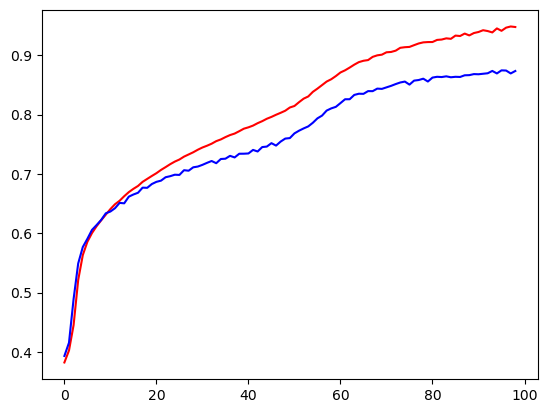

In [19]:
train_model(keras.layers.GRU)